## Flood Analysis & Prediction 

### Importing Libraries

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns

In [12]:
df = pd.read_csv("D:/CSE (AI & ML)/Data Analytics Internship/Final Project/train.csv")
df.head(10)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
5,5,5,4,1,4,2,4,6,6,7,...,3,5,5,4,4,6,8,3,2,0.440
6,6,8,3,1,2,3,7,3,4,6,...,2,5,6,4,5,6,3,4,6,0.460
7,7,6,6,5,7,5,5,3,5,5,...,5,3,5,5,8,6,8,5,6,0.595
8,8,5,2,8,5,4,5,2,4,5,...,9,2,7,3,4,6,4,5,5,0.505
9,9,4,2,3,5,8,6,5,5,7,...,6,3,3,4,4,3,3,5,6,0.455


### Explore data

In [13]:
df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [15]:
# Checking null values
df.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [16]:
# Checking duplicate values
df.duplicated().sum()

np.int64(0)

In [17]:
#Drop unusual colunm from Dataset
df.drop('id',axis=1,inplace=True)

In [18]:
# Summary of Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


### Data Visualization

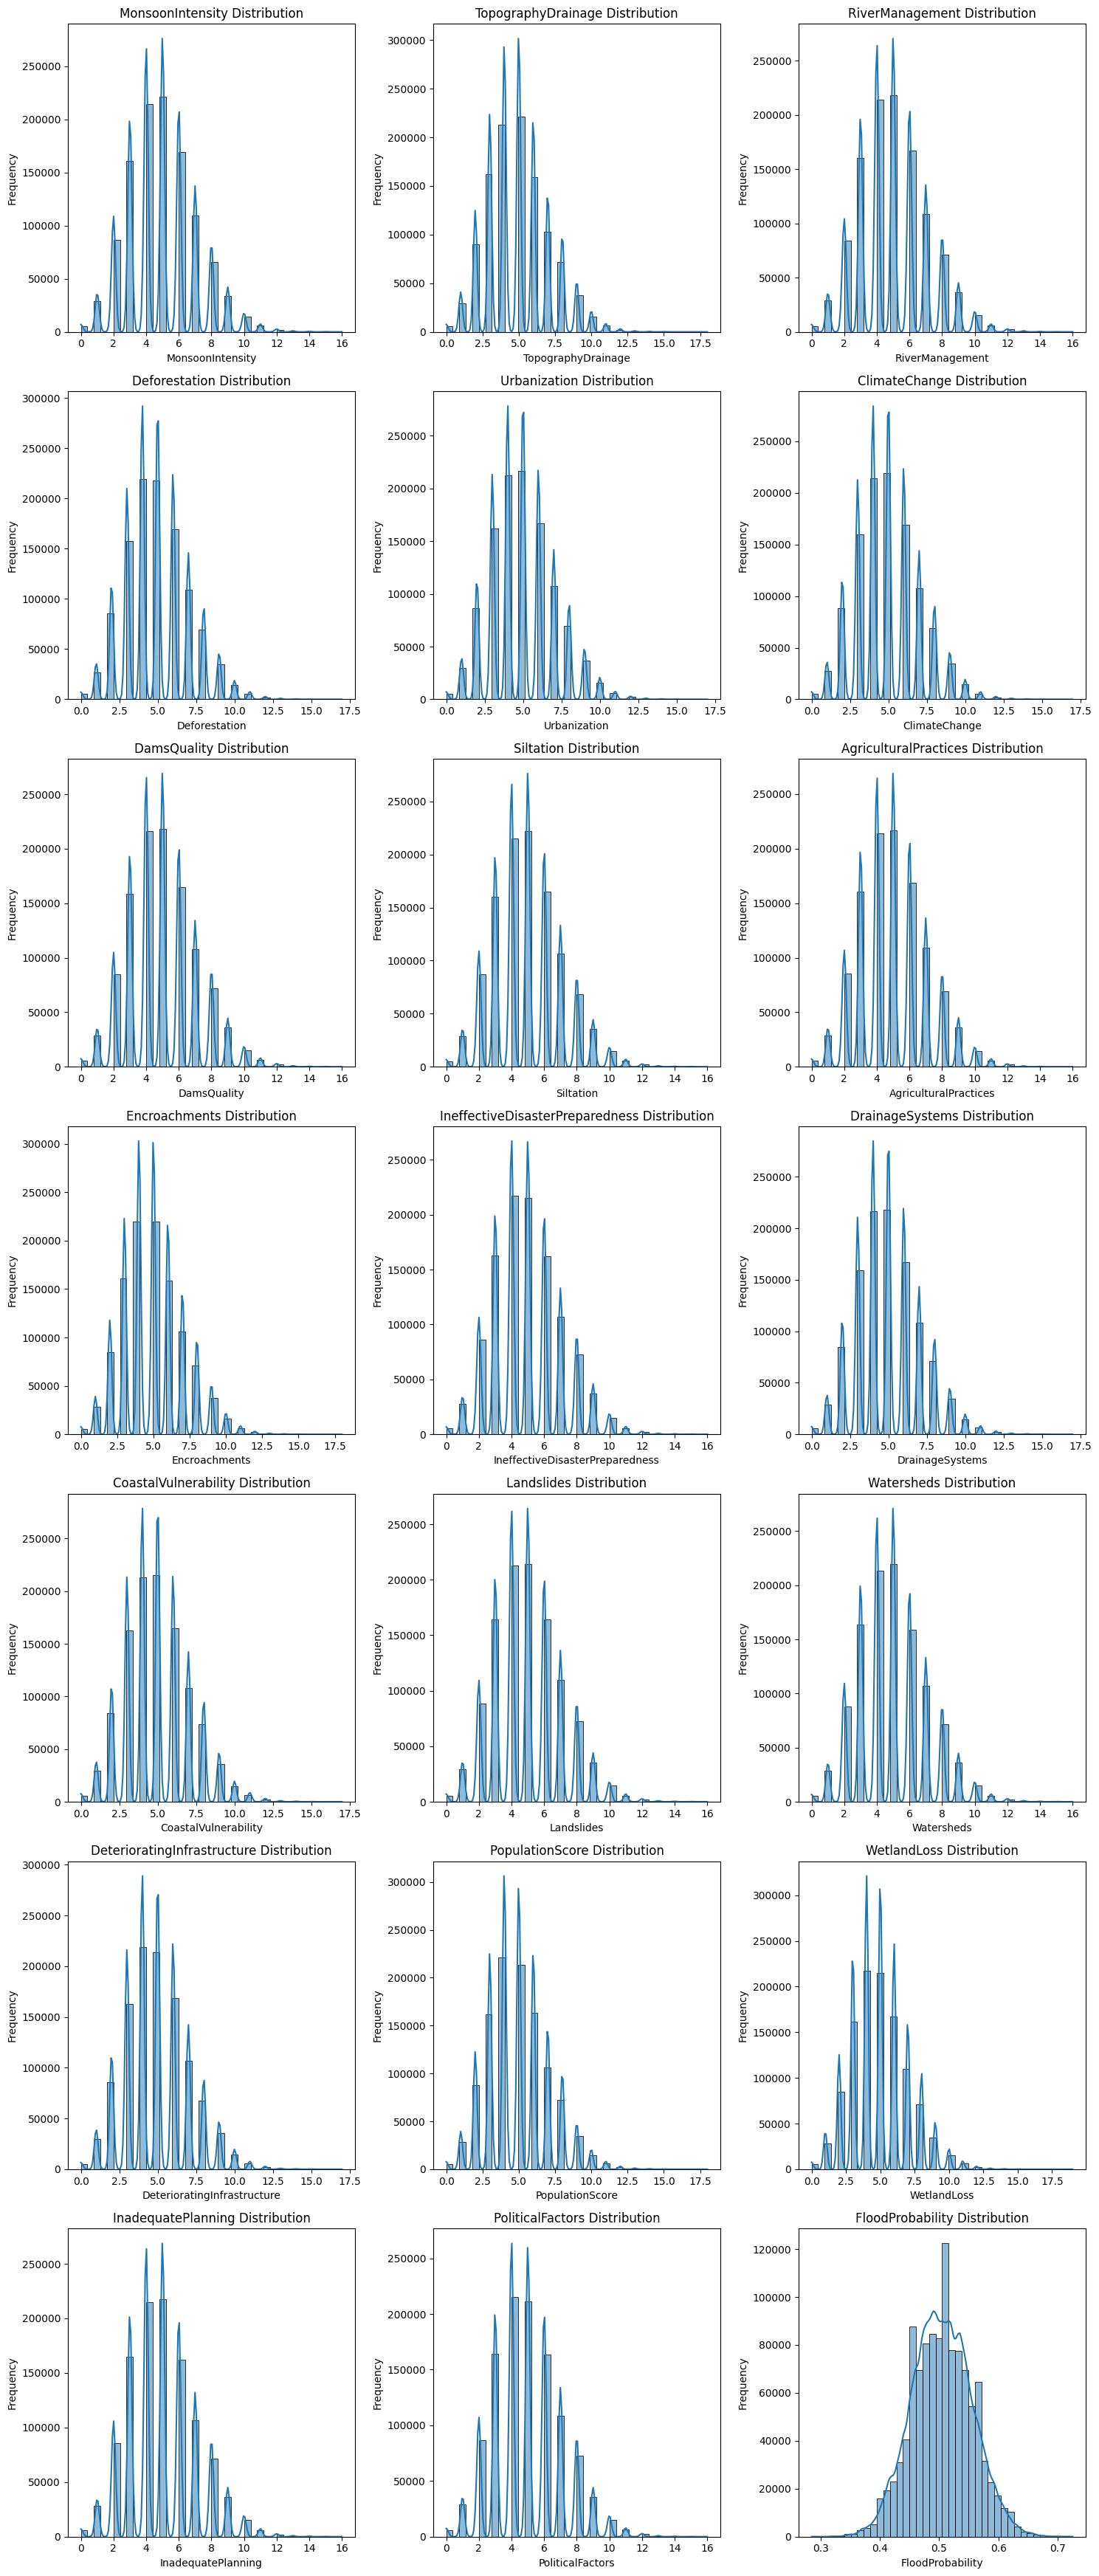

In [19]:
#Histogram Distribution of Flood Dataset

# Define number of rows and columns for the grid
nrows = (len(df.columns) + 2) // 3  # 3 graphs per row
ncols = min(len(df.columns), 3)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten axes if necessary
if nrows == 1:
    axes = [axes]

# Plot distribution for each feature
for i, col in enumerate(df.columns):
    row_index = i // ncols
    col_index = i % ncols
    ax = axes[row_index][col_index]
    sns.histplot(df[col],bins=40, kde=True, ax=ax)
    ax.set_title(col + ' Distribution')
    ax.set_ylabel('Frequency')
    ax.set_xlabel(col)

# Remove empty subplots if ncols * nrows > number of features
if nrows * ncols > len(df.columns):
    for i in range(len(df.columns), nrows * ncols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

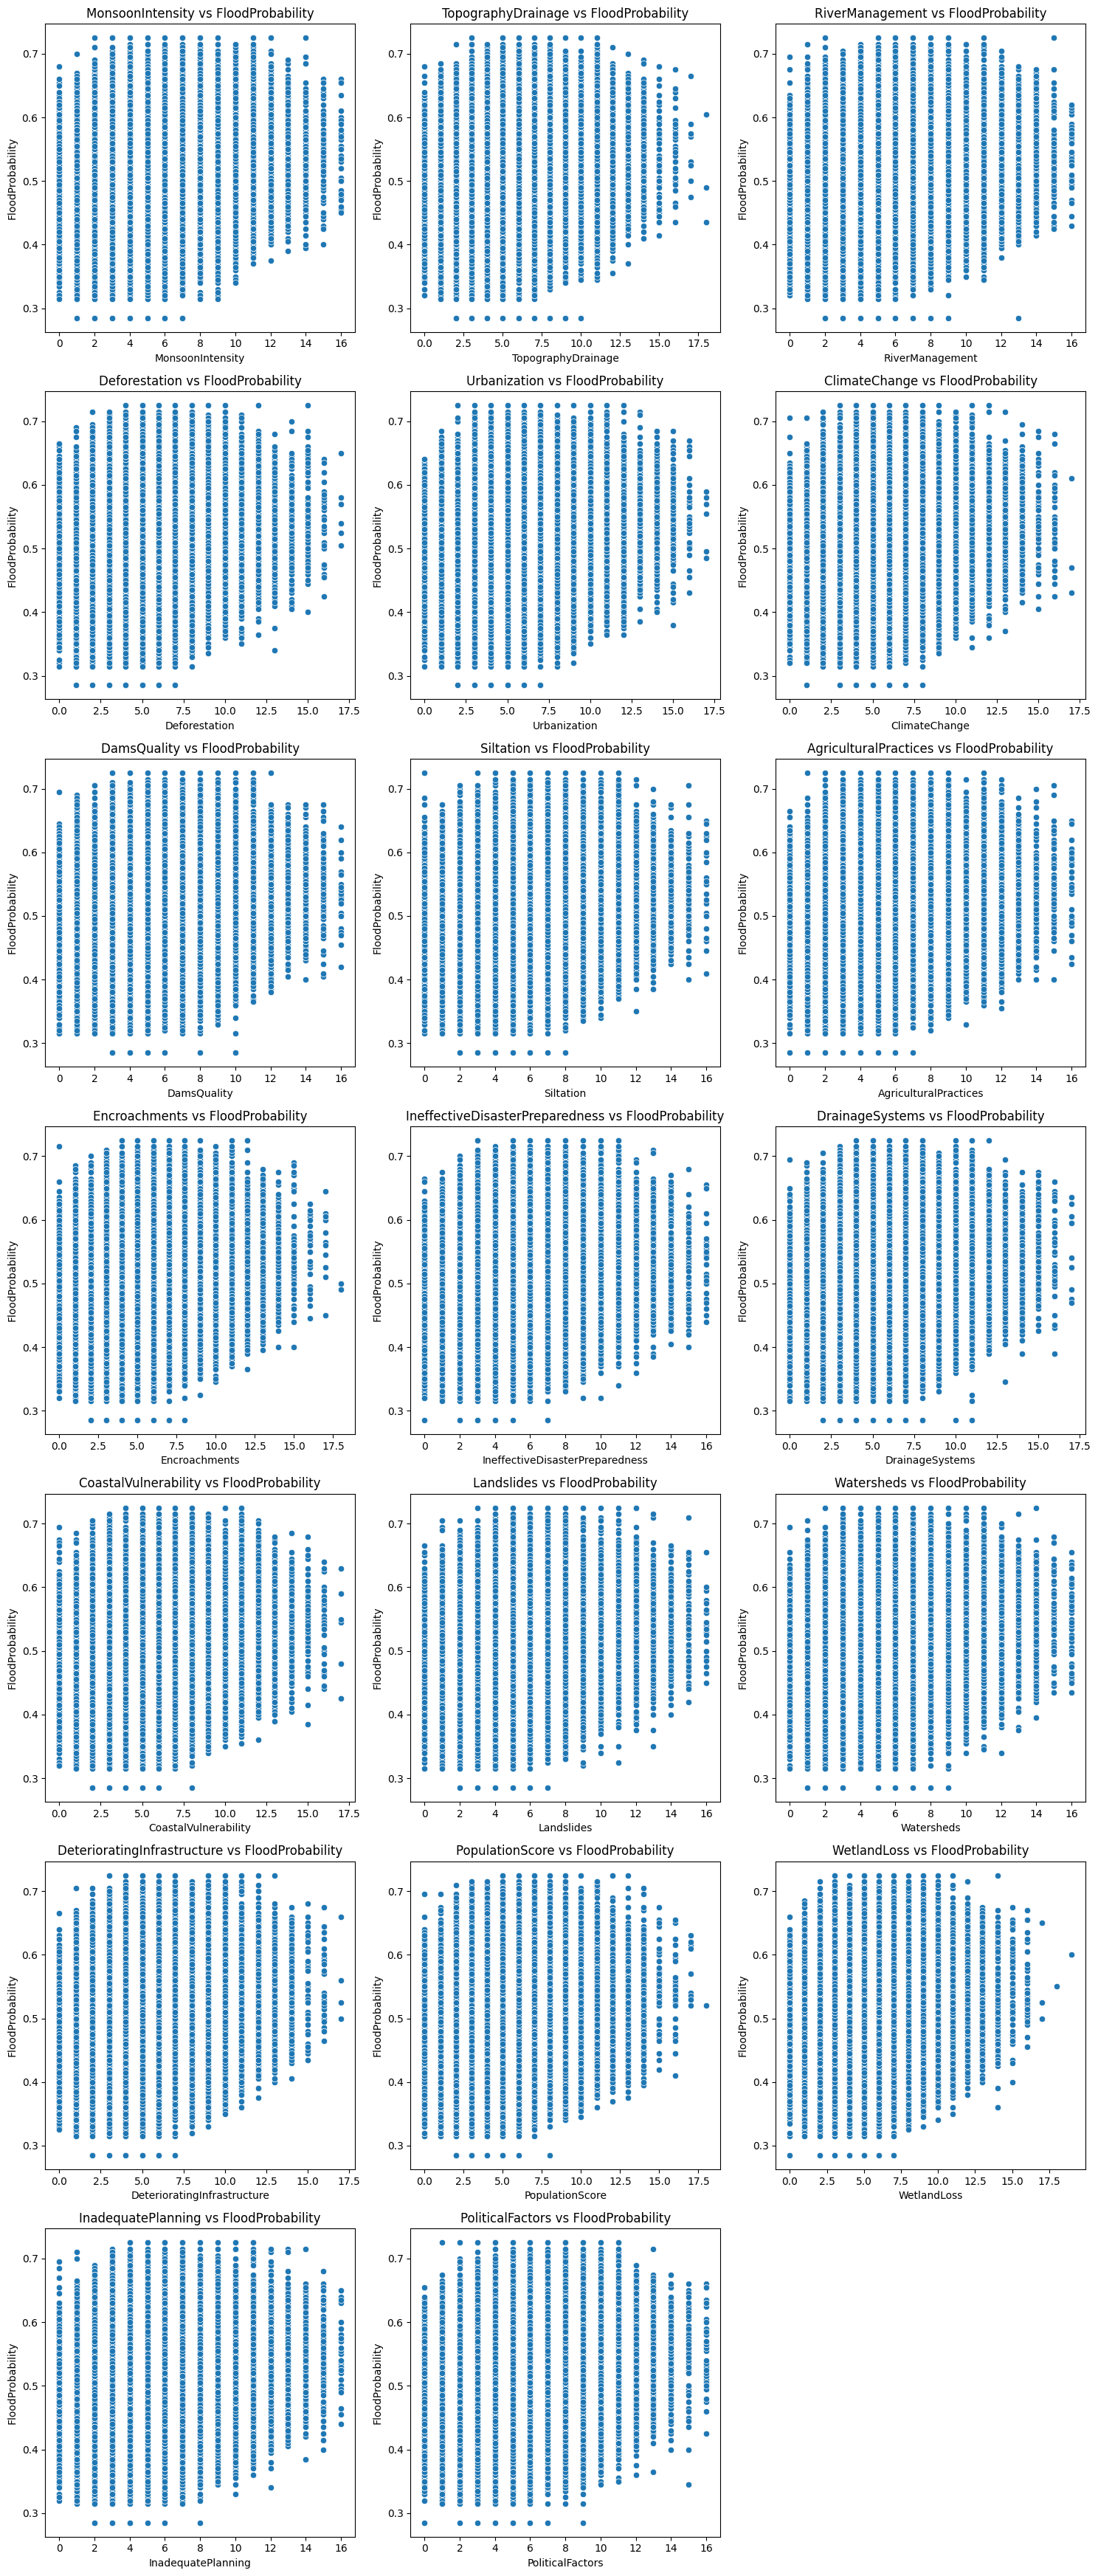

In [20]:
# Define target column
target_column = 'FloodProbability'

# Define number of rows and columns for the grid
nrows = (len(df.columns) - 1 + 2) // 3  # 3 graphs per row
ncols = min(len(df.columns) - 1, 3)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten axes if necessary
if nrows == 1:
    axes = [axes]

# Plot scatter plot for each feature with the target column
for i, col in enumerate(df.columns):
    if col == target_column:
        continue
    row_index = i // ncols
    col_index = i % ncols
    ax = axes[row_index][col_index]
    sns.scatterplot(x = df[col], y = df[target_column],ax=ax)
    ax.set_title(f'{col} vs {target_column}')
    ax.set_xlabel(col)
    ax.set_ylabel(target_column)

# Remove empty subplots if ncols * nrows > number of features
if nrows * ncols > len(df.columns) - 1:
    for i in range(len(df.columns) - 1, nrows * ncols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show();

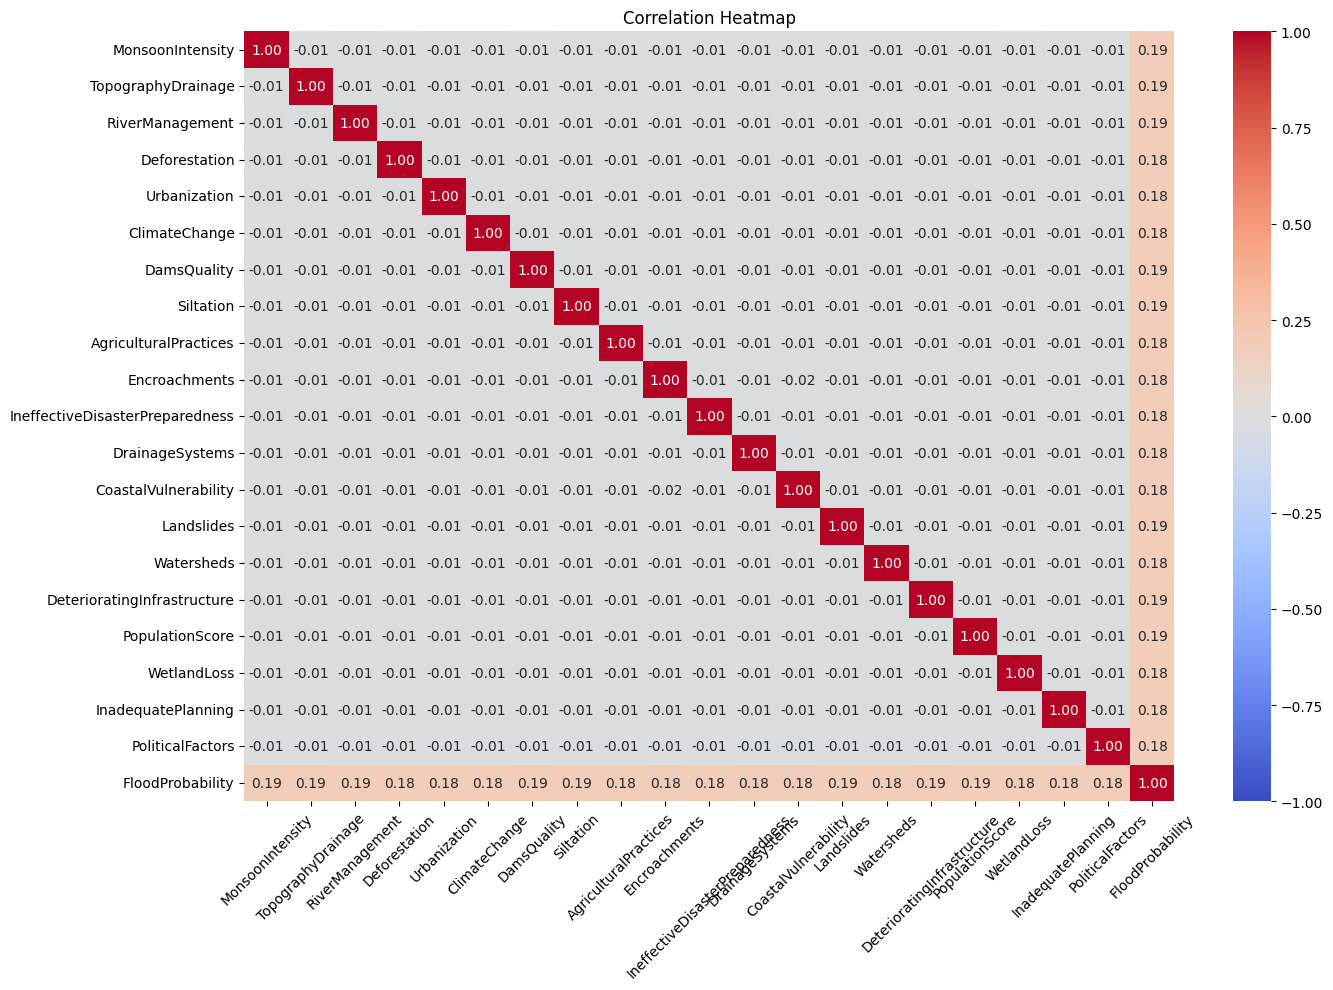

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True,fmt='.2f', cmap='coolwarm', vmax=1, vmin=-1)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()

### Split data

In [22]:
X = df.drop(columns= ['FloodProbability']) #features
y = df['FloodProbability'] #target

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.85,random_state=0)

### Train the Model

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [36]:
lr.fit(X_train,y_train)

LinearRegression()

### Predictions

In [37]:
y_pred_lr = lr.predict(X_test)

### Accuracy of Model

In [38]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [39]:
mape = mean_absolute_percentage_error(y_test,y_pred_lr)
print("Error of Linear Regression Model = %.2f"%(mape*100),'%')
print("Accuracy of Linear Regression Model = %.2f"%((1 - mape)*100),'%')

Error of Linear Regression Model = 3.19 %
Accuracy of Linear Regression Model = 96.81 %


In [40]:
r2 = r2_score(y_test,y_pred_lr)
print("R2 score of Linear Regression = %.2f"%(r2))

R2 score of Linear Regression = 0.84


### Competition Test Data

In [42]:
df2 = pd.read_csv("D:/CSE (AI & ML)/Data Analytics Internship/Final Project/test.csv")
df2.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


### Exploring Test Data

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [44]:
df2.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [45]:
test_data = df2.drop(columns=['id'])

In [46]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,745305.0,4.915610,2.056295,0.0,3.0,5.0,6.0,16.0
TopographyDrainage,745305.0,4.930288,2.094117,0.0,3.0,5.0,6.0,17.0
RiverManagement,745305.0,4.960027,2.071722,0.0,4.0,5.0,6.0,16.0
Deforestation,745305.0,4.946084,2.052602,0.0,4.0,5.0,6.0,17.0
Urbanization,745305.0,4.938424,2.081816,0.0,3.0,5.0,6.0,17.0
ClimateChange,745305.0,4.933524,2.059243,0.0,3.0,5.0,6.0,17.0
DamsQuality,745305.0,4.958468,2.089312,0.0,4.0,5.0,6.0,16.0
Siltation,745305.0,4.927651,2.068110,0.0,3.0,5.0,6.0,16.0
AgriculturalPractices,745305.0,4.945308,2.073404,0.0,3.0,5.0,6.0,16.0
Encroachments,745305.0,4.950620,2.081750,0.0,4.0,5.0,6.0,17.0


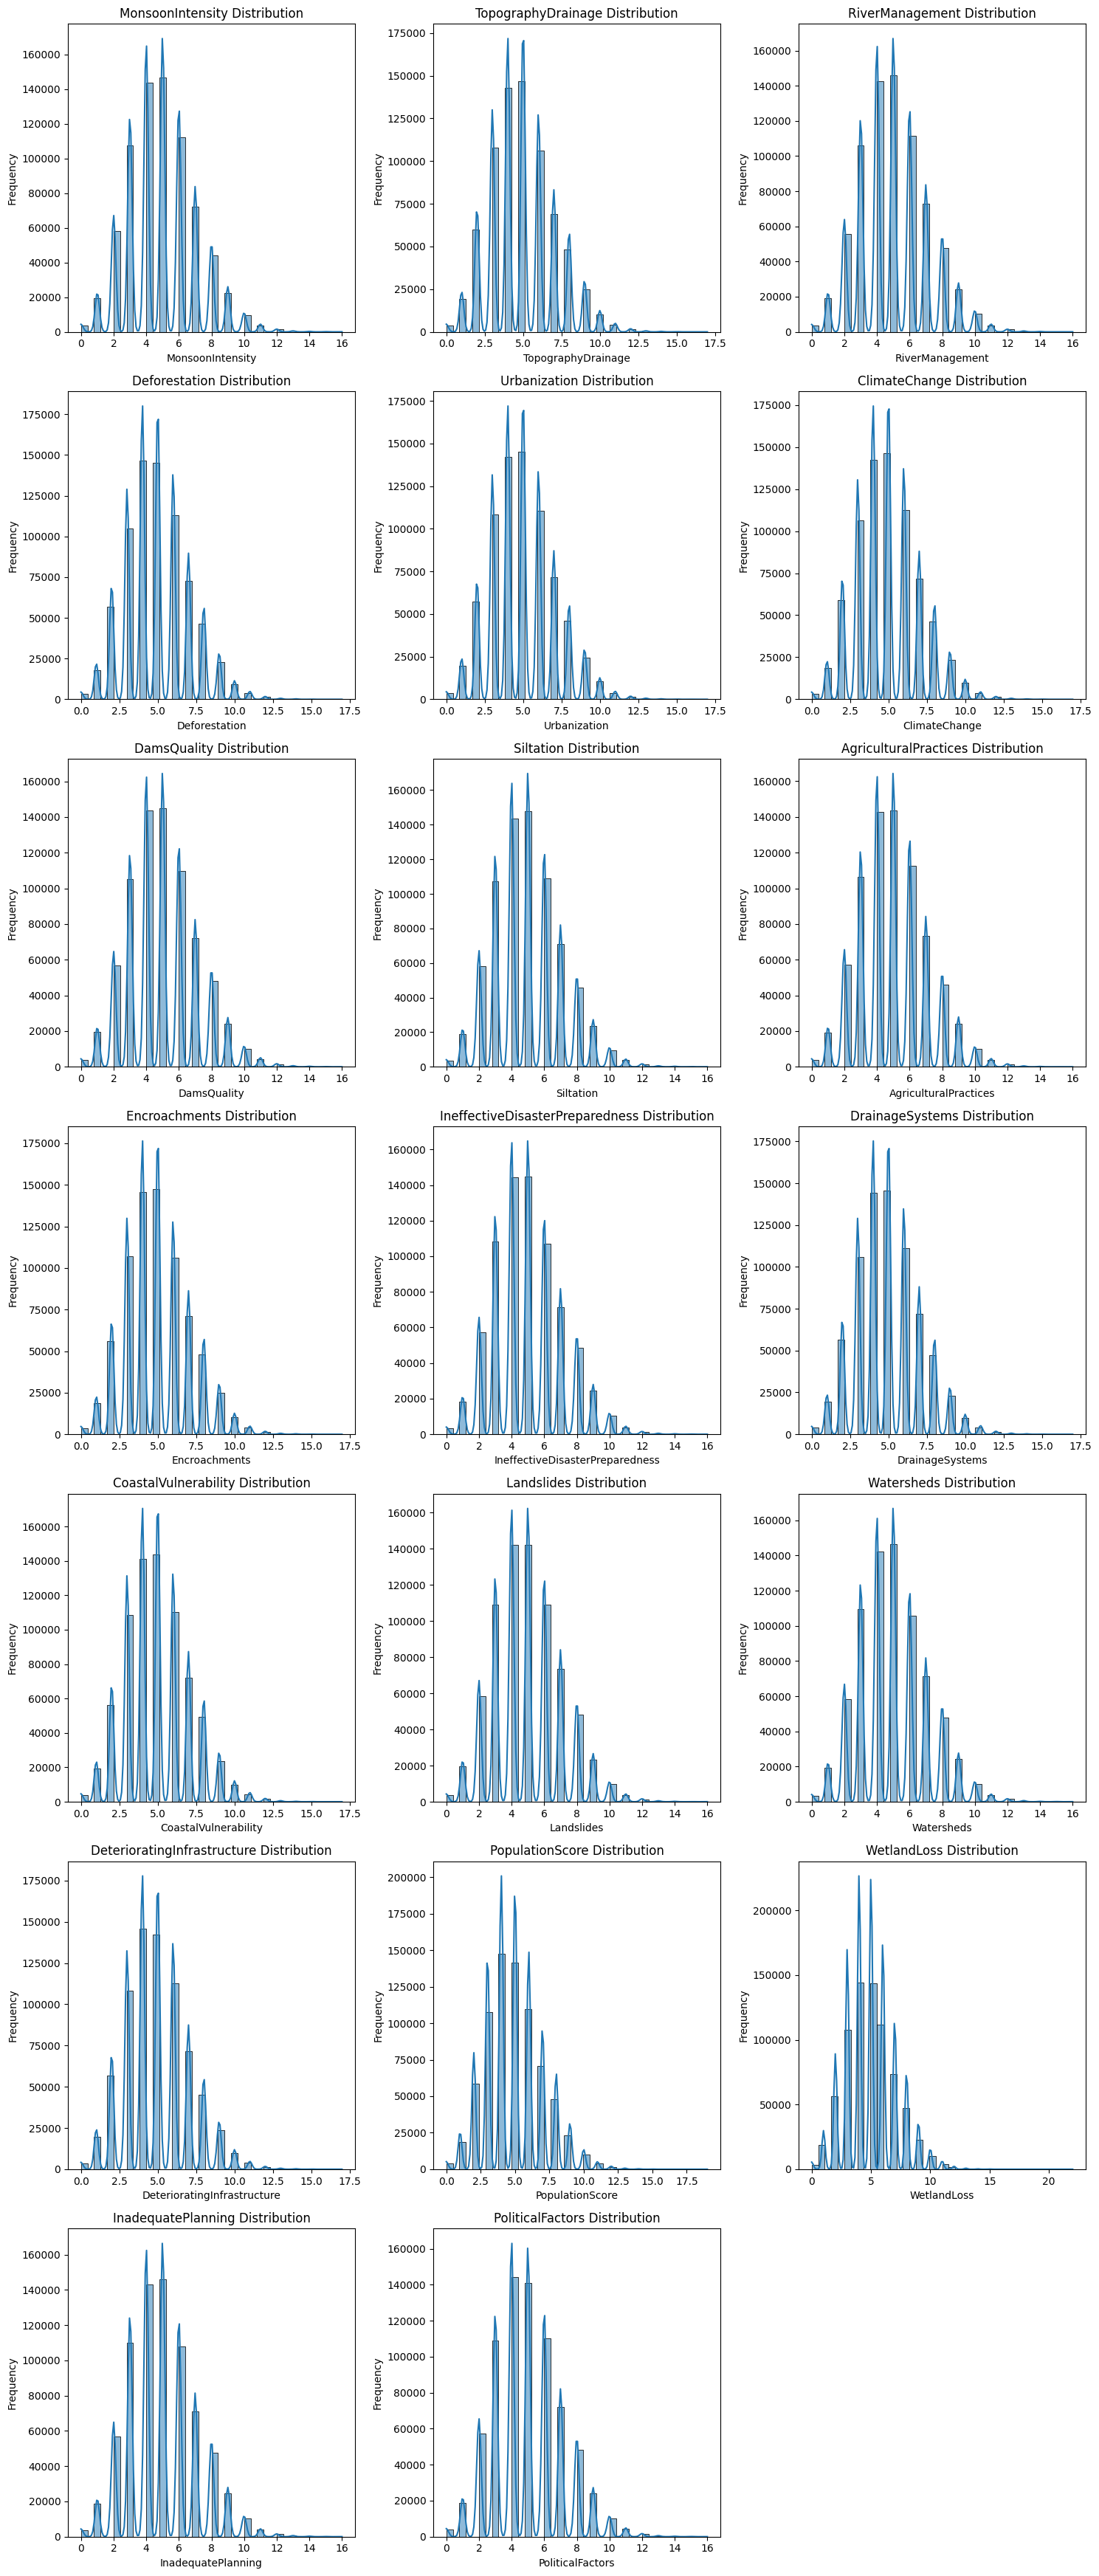

In [47]:
# Define number of rows and columns for the grid
nrows = (len(test_data.columns) + 2) // 3  # 3 graphs per row
ncols = min(len(test_data.columns), 3)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten axes if necessary
if nrows == 1:
    axes = [axes]

# Plot distribution for each feature
for i, col in enumerate(test_data.columns):
    row_index = i // ncols
    col_index = i % ncols
    ax = axes[row_index][col_index]
    sns.histplot(test_data[col],bins=40, kde=True, ax=ax)
    ax.set_title(col + ' Distribution')
    ax.set_ylabel('Frequency')
    ax.set_xlabel(col)
    
# Remove empty subplots if ncols * nrows > number of features
if nrows * ncols > len(test_data.columns):
    for i in range(len(test_data.columns), nrows * ncols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show();

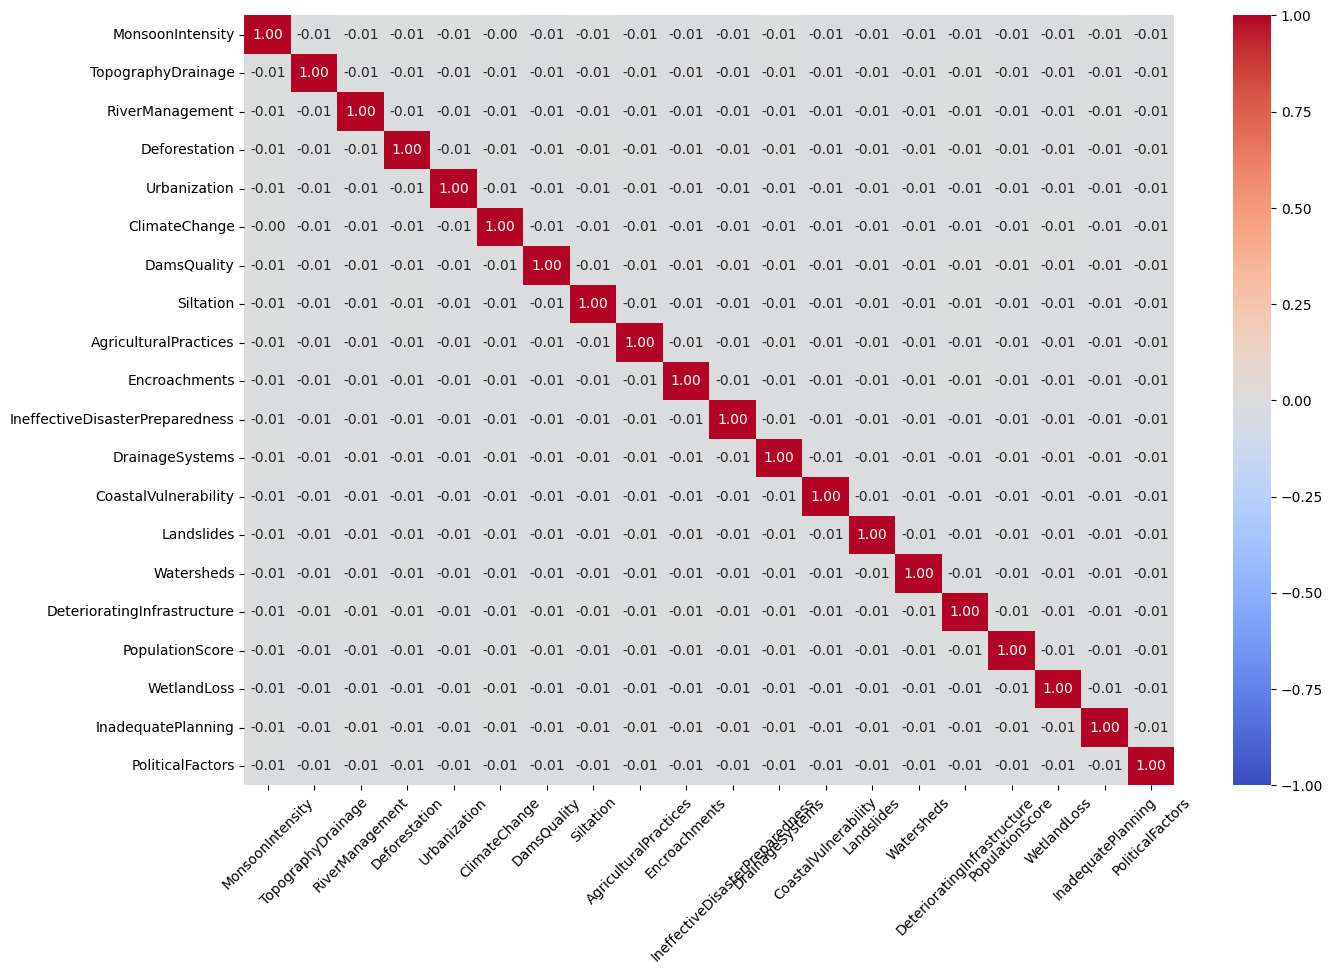

In [48]:
plt.figure(figsize=(15, 10))
sns.heatmap(test_data.corr(), annot=True,fmt='.2f', cmap='coolwarm', vmax=1, vmin=-1)
plt.xticks(rotation=45);

In [49]:
pred_lr = lr.predict(test_data)
print(pred_lr)

[0.57362292 0.4552767  0.4547269  ... 0.62437714 0.55090745 0.51149648]


In [50]:
output = pd.DataFrame({
    'id' : df2.id,
    'FloodProbability' : pred_lr
})

In [51]:
output.to_csv('submission.csv',index=False)
print(output)

             id  FloodProbability
0       1117957          0.573623
1       1117958          0.455277
2       1117959          0.454727
3       1117960          0.466198
4       1117961          0.466050
...         ...               ...
745300  1863257          0.477185
745301  1863258          0.449386
745302  1863259          0.624377
745303  1863260          0.550907
745304  1863261          0.511496

[745305 rows x 2 columns]


In [52]:
prediction = output.drop(['id'], axis=1, inplace=True)
print(prediction)
print(output)

None
        FloodProbability
0               0.573623
1               0.455277
2               0.454727
3               0.466198
4               0.466050
...                  ...
745300          0.477185
745301          0.449386
745302          0.624377
745303          0.550907
745304          0.511496

[745305 rows x 1 columns]
